# LAB 10 : K-medoids algorithm

# K-Medoids Algorithm

## Introduction
K-Medoids is a variation of the K-Means clustering algorithm that uses actual data points as cluster centers (medoids) instead of centroids. It is more robust to outliers compared to K-Means.

## Algorithm Steps
1. **Initialization**: Randomly initialize \( K \) medoids from the dataset.
2. **Assignment**: Assign each data point to the nearest medoid, forming \( K \) clusters.
3. **Update**: For each cluster, select the data point that minimizes the total dissimilarity to other points in the cluster, replacing the medoid with this new point.
4. **Repeat**: Repeat steps 2 and 3 until convergence, i.e., until the medoids no longer change significantly.

## Objective
The objective of the K-Medoids algorithm is to minimize the total dissimilarity (or distance) between data points and their corresponding medoids within the clusters.

## Formulas
- **Euclidean Distance**: 

$$ d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

## Key Points
- K-Medoids is more robust to outliers compared to K-Means because it uses actual data points as cluster centers.
- The algorithm can be computationally expensive, especially for large datasets, as it involves calculating distances between all data points and medoids.
- It is important to choose an appropriate number of clusters \( K \) and the maximum number of iterations to prevent overfitting and improve convergence.


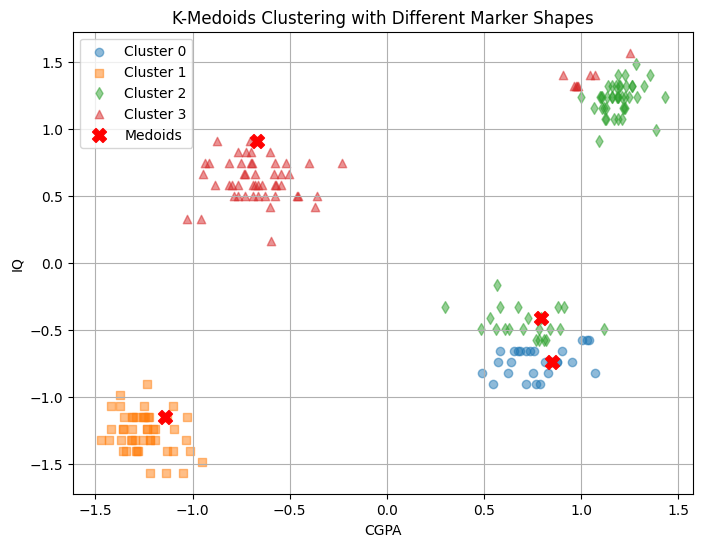

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

# Load the dataset
df = pd.read_csv('student_clustering.csv')

# Prepare the data
X = df[['cgpa', 'iq']].values

# Standardize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Function to initialize medoids
def initialize_medoids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Function to assign points to the nearest medoids
def assign_points(X, medoids):
    return pairwise_distances_argmin_min(X, medoids)[0]

# Function to update medoids
def update_medoids(X, medoids, labels):
    new_medoids = np.zeros_like(medoids)
    for i, medoid in enumerate(medoids):
        cluster_points = X[labels == i]
        distances = pairwise_distances_argmin_min(cluster_points, cluster_points)[0]
        new_medoids[i] = cluster_points[np.argmin(distances)]
    return new_medoids

# K-Medoids algorithm
def kmedoids(X, k, max_iter=100):
    # Initialize medoids
    medoids = initialize_medoids(X, k)
    
    for _ in range(max_iter):
        # Assign points to the nearest medoids
        labels = assign_points(X, medoids)
        
        # Update medoids
        new_medoids = update_medoids(X, medoids, labels)
        
        # Check for convergence
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    
    return medoids, labels

# Apply K-Medoids
k = 4  # Number of clusters
medoids, labels = kmedoids(X, k)

# Visualize the clusters with different shapes
plt.figure(figsize=(8, 6))

# Define marker shapes
marker_shapes = ['o', 's', 'd', '^', 'x', '+', '*', 'h', 'p']

# Plot points for each cluster with different shapes
for label in np.unique(labels):
    plt.scatter(X[labels == label, 0], X[labels == label, 1], marker=marker_shapes[label % len(marker_shapes)], label=f'Cluster {label}', alpha=0.5)

plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', label='Medoids', s=100)  # Plot medoids

plt.title('K-Medoids Clustering with Different Marker Shapes')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.grid(True)
plt.show()
